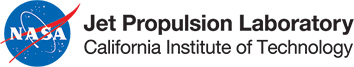

# **Delta-X Workshop**

## **Module 6: Sediment Grain Size (Bed and Suspended):**
*Created by Alexandra Christensen (April 2022)*

*Jet Propulsion Laboratory, California Institute of Technology*

*© 2022 California Institute of Technology. Government sponsorship acknowledged.*

Data Access:

>https://daac.ornl.gov/cgi-bin/dsviewer.pl?ds_id=2061

Citations:

> Nghiem, J., and G. Salter. 2022. Delta-X: Bed and Suspended Sediment Grain Size, Wax Lake Delta, LA, USA, 2021. ORNL DAAC, Oak Ridge, Tennessee, USA. https://doi.org/10.3334/ORNLDAAC/2061

Authors:

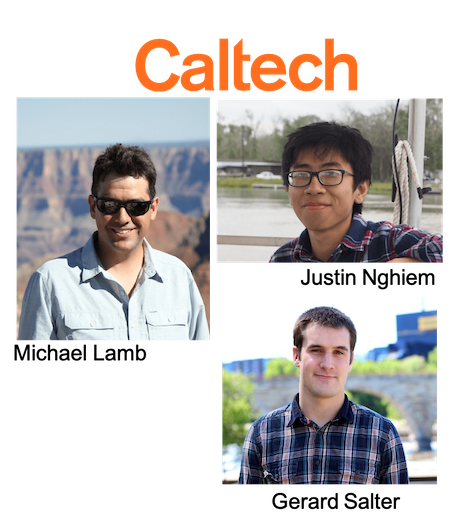



In [4]:
!pip install rasterio
import rasterio
import rasterio.plot

from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import string

input_dir = os.getcwd()
print(input_dir)


/content


**If you are not using Google Colab, don't run the next cell. It will change your input directory to the shared Google Drive folder, which you should only do if you're using Google Colab**

Second, we will grant access to your Google Drive account. If you have not done this before (or it's been a while), you will need to approve access. There will be 2 popups, make sure to allow both.

In [5]:
#For access to Google Drive files
from google.colab import files
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#For saving to Google Drive
from google.colab import drive

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
Gdrive = GoogleDrive(gauth)

drive.mount('/content/drive',force_remount=True)
input_dir = '/content/drive/My Drive/DeltaX_Workshop_2022/Tutorials/0_Field/Module6_GrainSize/'


Mounted at /content/drive


We will also import a basemap to use when making maps below.

In [15]:
basemap = rasterio.open(input_dir + 'basemap.tif')


The format of this dataset is slightly different than the others. Here each row repressents a sample and the columns indicate the sediment concentration at a particular grain size. 

In [12]:
sed_file = pd.read_csv(input_dir + "/DeltaX_Sediment_Grain_Size_2061/data/DeltaX_GrainSizeDistribution_Atcha_Spring2021.csv")
sed_file = sed_file.replace(-9999,np.nan)
print(sed_file.columns)
sed_file.head()


Index(['basin', 'campaign', 'site_id', 'latitude', 'longitude', 'time',
       'water_velocity', 'water_temp', 'water_salinity', 'water_depth',
       ...
       'sd_sediment_concentration_grainsize_1000_1100',
       'sd_sediment_concentration_grainsize_1100_1200',
       'sd_sediment_concentration_grainsize_1200_1320',
       'sd_sediment_concentration_grainsize_1320_1450',
       'sd_sediment_concentration_grainsize_1450_1590',
       'sd_sediment_concentration_grainsize_1590_1750',
       'sd_sediment_concentration_grainsize_1750_1910',
       'sd_sediment_concentration_grainsize_1910_2100',
       'particulate_organic_carbon_poc_concentration',
       'sd_particulate_organic_carbon_poc_concentration'],
      dtype='object', length=214)


,basin,campaign,site_id,latitude,longitude,time,water_velocity,water_temp,water_salinity,water_depth,...,sd_sediment_concentration_grainsize_1000_1100,sd_sediment_concentration_grainsize_1100_1200,sd_sediment_concentration_grainsize_1200_1320,sd_sediment_concentration_grainsize_1320_1450,sd_sediment_concentration_grainsize_1450_1590,sd_sediment_concentration_grainsize_1590_1750,sd_sediment_concentration_grainsize_1750_1910,sd_sediment_concentration_grainsize_1910_2100,particulate_organic_carbon_poc_concentration,sd_particulate_organic_carbon_poc_concentration
0,Atchafalaya,Spring_2021,Wax Lake Delta,29.493364,-91.440196,2021-03-24 17:22,NaN,25.700000,NaN,0.62,...,1.460000e-08,0.000000e+00,0,0,0,0,0,0,in_progress,in_progress
1,Atchafalaya,Spring_2021,Wax Lake Delta,29.493364,-91.440196,2021-03-24 17:22,NaN,25.700000,NaN,0.62,...,4.294386e-02,4.660341e-03,0,0,0,0,0,0,in_progress,in_progress
2,Atchafalaya,Spring_2021,Wax Lake Delta,29.510494,-91.448753,2021-03-25 13:33,0.623804,14.868157,NaN,2.30,...,1.687461e-02,1.831261e-03,0,0,0,0,0,0,in_progress,in_progress
3,Atchafalaya,Spring_2021,Wax Lake Delta,29.510598,-91.448848,2021-03-25 13:39,0.577527,14.868157,NaN,2.30,...,6.460000e-08,1.120000e-08,0,0,0,0,0,0,in_progress,in_progress
4,Atchafalaya,Spring_2021,Wax Lake Delta,29.510559,-91.448873,2021-03-25 13:43,0.587736,14.868157,NaN,2.30,...,0.000000e+00,0.000000e+00,0,0,0,0,0,0,in_progress,in_progress


Samples that were collected from the bed samples do not have a total sediment concentration. For now, we will exclude those and only work with the suspended sediment samples.

In [13]:
sed_file_suspended = sed_file[~np.isnan(sed_file['total_sediment_concentration'])]


Let's start simply by looking at the total sediment concentration (mg/L)


We'll find a simple average for each location

In [21]:
sed_means = sed_file_suspended.groupby(['latitude','longitude'])[['total_sediment_concentration']].agg(np.nanmean)


,,total_sediment_concentration
latitude,longitude,
29.493364,-91.440196,104.082384
29.493397,-91.442670,156.112914
29.493972,-91.439080,153.942179
29.493987,-91.439121,152.705061
29.494043,-91.439064,156.211313
29.494066,-91.439004,198.407524
29.494072,-91.439088,146.993318
29.494086,-91.439103,261.033622
29.509082,-91.440579,191.767647


Let's plot the average sediment concentration over the basemap. There are many points close together, so you won't be able to see all of the points in this figure.

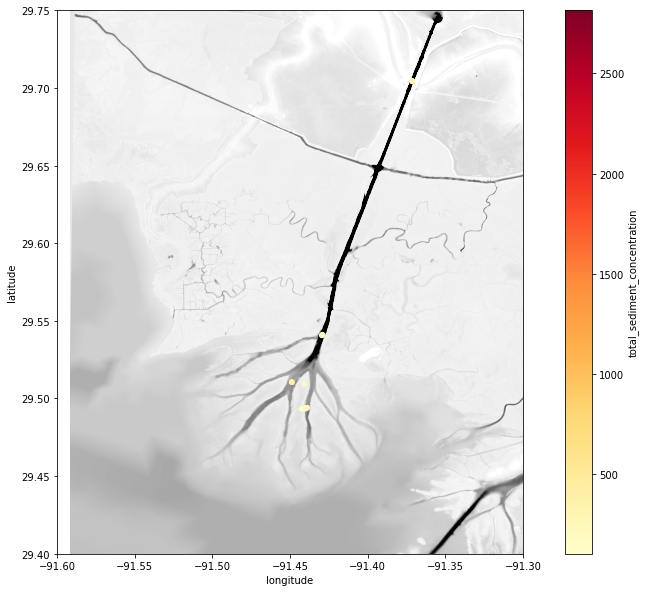

In [22]:
fig, ax = plt.subplots(figsize=(15,10))
rasterio.plot.show(basemap,transform=basemap.transform,vmin=-10,vmax=2,ax=ax,cmap='Greys_r')
plt.axis([-91.6, -91.3, 29.4, 29.75])

sed_means.reset_index().plot(x='longitude',y='latitude', ax=ax,kind="scatter", c="total_sediment_concentration",colormap="YlOrRd")



You'll see there are columns for grain size intervals of varying size. For reference, columns 12-212 contain grain size distribution data.

We will use three samples to look at these distributions.

First let's plot these points and compare the total sediment concentration of each. One point is on Mike Island, at the marsh/channel edge (#1), one point is on Mike Island, far in the interiod (#2), and one point is in the main channel at the delta apex (#3).

Text(-10, -15, '290.0852198')

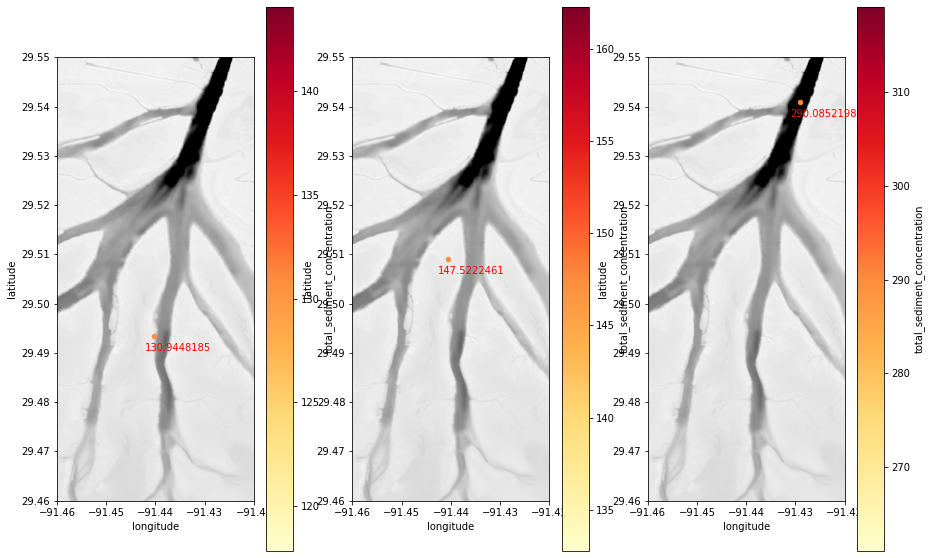

In [31]:

fig, [ax1,ax2,ax3] = plt.subplots(ncols=3,figsize=(15,10))

rasterio.plot.show(basemap,transform=basemap.transform,vmin=-10,vmax=2,ax=ax1,cmap='Greys_r')
sed_file_suspended[sed_file_suspended.index==1].plot(x='longitude',y='latitude', ax=ax1,kind="scatter", c="total_sediment_concentration",colormap="YlOrRd")
ax1.axis([-91.46, -91.42, 29.46, 29.55])
ax1.annotate(sed_file_suspended['total_sediment_concentration'][1],[sed_file_suspended['longitude'][1],sed_file_suspended['latitude'][1]],xytext=(-10,-15), textcoords='offset points',color='red')

rasterio.plot.show(basemap,transform=basemap.transform,vmin=-10,vmax=2,ax=ax2,cmap='Greys_r')
sed_file_suspended[sed_file_suspended.index==15].plot(x='longitude',y='latitude', ax=ax2,kind="scatter", c="total_sediment_concentration",colormap="YlOrRd")
ax2.axis([-91.46, -91.42, 29.46, 29.55])
ax2.annotate(sed_file_suspended['total_sediment_concentration'][15],[sed_file_suspended['longitude'][15],sed_file_suspended['latitude'][15]],xytext=(-10,-15), textcoords='offset points',color='red')

rasterio.plot.show(basemap,transform=basemap.transform,vmin=-10,vmax=2,ax=ax3,cmap='Greys_r')
sed_file_suspended[sed_file_suspended.index==25].plot(x='longitude',y='latitude', ax=ax3,kind="scatter", c="total_sediment_concentration",colormap="YlOrRd")
ax3.axis([-91.46, -91.42, 29.46, 29.55])
ax3.annotate(sed_file_suspended['total_sediment_concentration'][25],[sed_file_suspended['longitude'][25],sed_file_suspended['latitude'][25]],xytext=(-10,-15), textcoords='offset points',color='red')

Now let's extract the grain size distributions of each sample.

In [32]:
one =  sed_file[sed_file.index==1].iloc[0][12:112]
two = sed_file[sed_file.index==15].iloc[0][12:112]
three = sed_file[sed_file.index==25].iloc[0][12:112]

grain_sizes = sed_file.columns[12:112]
upper = [float(i.split('_')[-1]) for i in grain_sizes]
lower = [float(i.split('_')[-2]) for i in grain_sizes]


and plot them

Text(0, 0.5, 'Sediment Concentration (mg/L)')

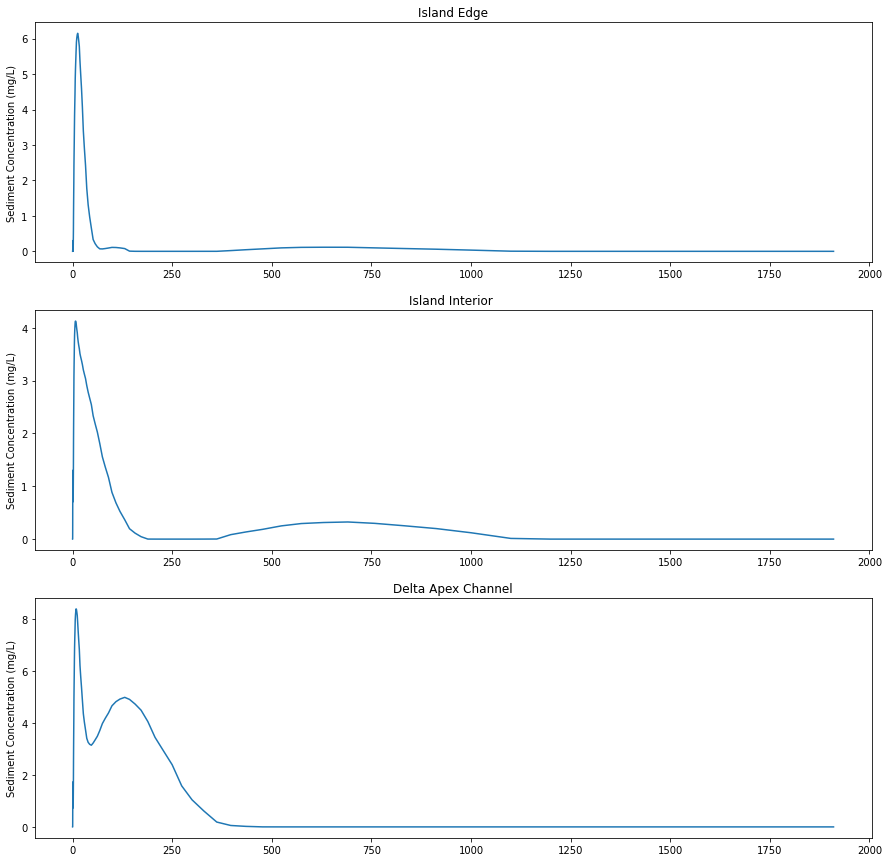

In [33]:
fig,[ax1,ax2,ax3] = plt.subplots(nrows=3,figsize=(15,15))
ax1.plot(lower,one.values)
ax1.set_title('Island Edge')
ax1.set_ylabel('Sediment Concentration (mg/L)')

ax2.plot(lower,two.values)
ax2.set_title('Island Interior ')
ax2.set_ylabel('Sediment Concentration (mg/L)')

ax3.plot(lower,three.values)
ax3.set_title('Delta Apex Channel')
ax3.set_ylabel('Sediment Concentration (mg/L)')


# What do you notice about these distribution curves?

To calculate the median grain size (D50), we need to create a cumulative distribution curve.

This is done in the function process_grain_size shown below.

In [36]:
def process_grain_size(sample):
  df = sed_file[sed_file.index==sample].iloc[0]
  total_mass = df['total_sediment_concentration']
  cumulative_distribution = df[12:112].cumsum()/total_mass
  difference_array = np.absolute(cumulative_distribution.values-0.5)
  index = difference_array.argmin()
  d50 = lower[index]
  return d50, cumulative_distribution

Once we define this function, we can apply it to each of the samples. This outputs the cumulative distribution and the d50.

In [37]:
one_d50,one_sum = process_grain_size(1)
two_d50,two_sum = process_grain_size(15)
three_d50,three_sum = process_grain_size(25)

Now we can plot these cumulative distribution and easily see where the d50 is

Text(100, 0.51, 'D50 is 12.9um')

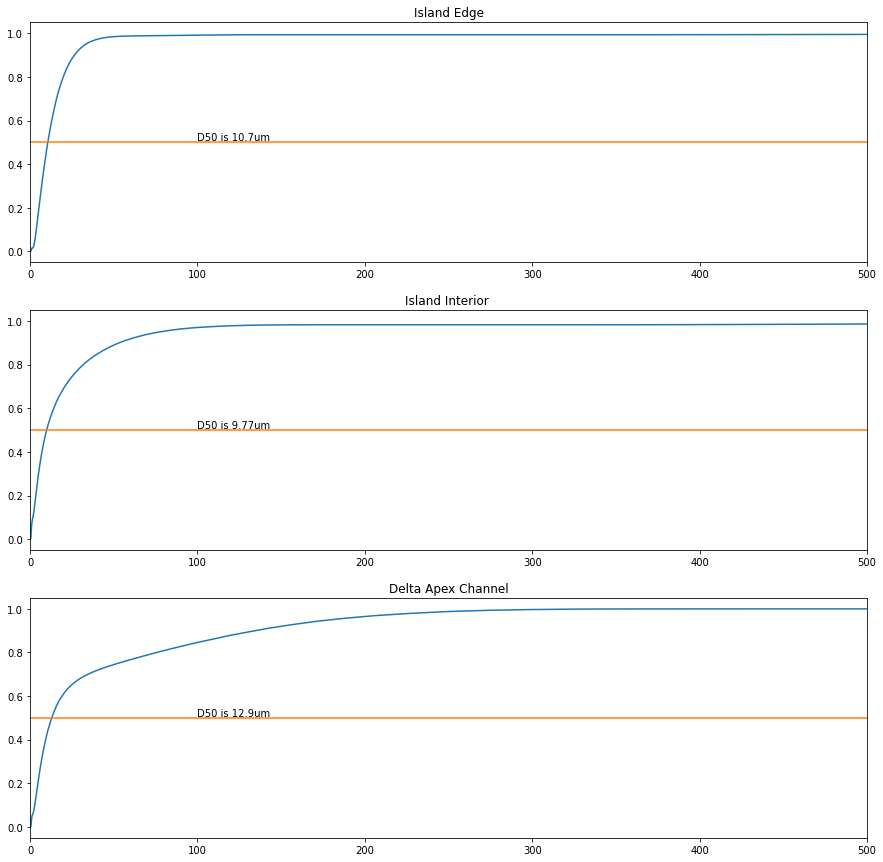

In [38]:
fig,[ax1,ax2,ax3] = plt.subplots(nrows=3,figsize=(15,15))
ax1.plot(lower,one_sum.values)
ax1.set_title('Island Edge')
ax1.plot(np.linspace(0,1000,2),[0.5,0.5])
ax1.set_xlim([0,500])
ax1.text(100,0.51,"D50 is %sum" %(one_d50))

ax2.plot(lower,two_sum.values)
ax2.set_title('Island Interior ')
ax2.plot(np.linspace(0,1000,2),[0.5,0.5])
ax2.set_xlim([0,500])
ax2.text(100,0.51,"D50 is %sum" %(two_d50))

ax3.plot(lower,three_sum.values)
ax3.set_title('Delta Apex Channel')
ax3.plot(np.linspace(0,1000,2),[0.5,0.5])
ax3.set_xlim([0,500])
ax3.text(100,0.51,"D50 is %sum" %(three_d50))


Check the chart below to to see size classifications.


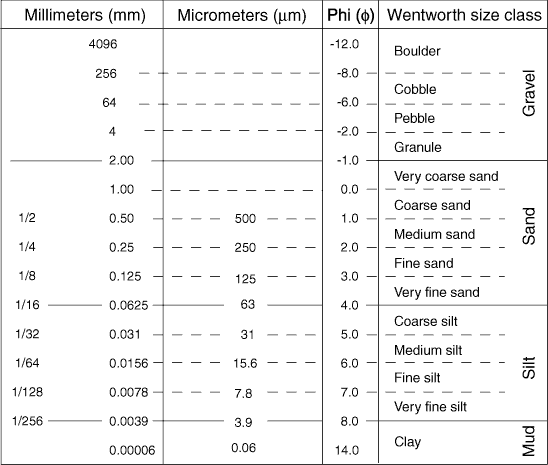

# What trends do you notice between these three samples.

Try different samples to compare and discuss.